In [1]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

epoch=0, loss=0.7287
epoch=100, loss=0.1493
epoch=200, loss=0.0782
epoch=300, loss=0.0524
epoch=400, loss=0.0392
epoch=500, loss=0.0313
epoch=600, loss=0.0260
epoch=700, loss=0.0222
epoch=800, loss=0.0194
epoch=900, loss=0.0172

Training accuracy: 1.0

Test sample: [1, 2, 3, 4]
Predicted probability: 0.12484172471357424
Predicted class: 0


In [2]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [ ]:
theta_best 

array([[3.75008875],
       [3.21625951]])

In [4]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.75008875],
       [10.18260777]])

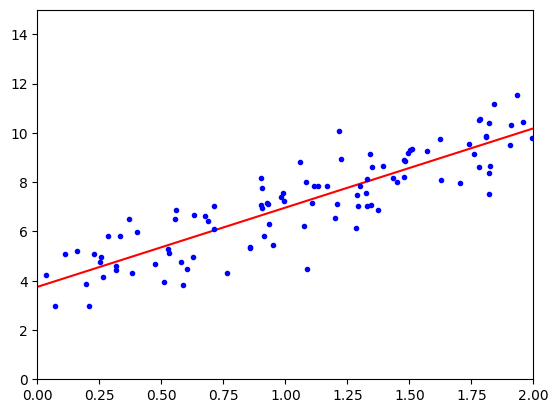

In [8]:
import matplotlib.pyplot as plt
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()


In [9]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.75008875]), array([[3.21625951]]))

In [10]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.75008875],
       [3.21625951]])

In [11]:
np.linalg.pinv(X_b).dot(y)

array([[3.75008875],
       [3.21625951]])

In [16]:
import math

# -----------------------------
# Dataset (learnable)
# -----------------------------
X = [
    [0, 0, 0, 1],
    [0, 1, 1, 1],
    [1, 1, 1, 1]
]
y = [0, 0, 1]
def sigmoid(z):
    return 1/(1+math.exp(-z))
def predict_proba(X ,W,b):

    z = 0
    for i in range(len(X)):

        z += X[i]*W[i]
    z+= b
    return sigmoid(z)

w = [0.0, 0.0, 0.0, 0.0]
b = 0.0
learning_rate = 0.1
epochs = 1000
eps = 1e-15
for epoch in range(epochs):
    total_loss = 0
    for i in range (len(X)):
        pred_y = predict_proba(X[i],w,b)
        pred_y = max(eps,min(1-eps,pred_y))
        loss = -(y[i]*math.log(pred_y) + (1-y[i])*math.log(1-pred_y))
        total_loss += loss

        diff = pred_y - y[i]
        for j in range(len(w)):
            w[j] -= learning_rate*X[i][j]*diff
        b -= learning_rate*diff
    if epoch % 100 == 0:
        print(f"epoch={epoch}, loss={total_loss/len(X):.4f}")
def predict(x,w,b,threshold=0.5):
    if predict_proba(x,w,b) > threshold:
        return 1
    else:
        return 0
correct = 0
    
for i in range(len(X)):
    if predict(X[i], w, b) == y[i]:
        correct += 1
accuracy = correct/len(X)

print("\nTraining accuracy:", accuracy)

# -----------------------------
# Test prediction
# -----------------------------
X_test = [1, 2, 3, 4]
prob = predict_proba(X_test, w, b)
pred = predict(X_test, w, b)

print("\nTest sample:", X_test)
print("Predicted probability:", prob)
print("Predicted class:", pred)


epoch=0, loss=0.7287
epoch=100, loss=0.1493
epoch=200, loss=0.0782
epoch=300, loss=0.0524
epoch=400, loss=0.0392
epoch=500, loss=0.0313
epoch=600, loss=0.0260
epoch=700, loss=0.0222
epoch=800, loss=0.0194
epoch=900, loss=0.0172

Training accuracy: 1.0

Test sample: [1, 2, 3, 4]
Predicted probability: 0.12484172471357424
Predicted class: 0
